# Analýza datasetu

Náš dataset obsahuje obrázky z troch nezávislých parkovísk. Každé parkovisku bolo snímané v rôznych časoch a rôznych podmienok počasia. Pre každý dataset sú pripravené obrázky pri každom z troch podmienok počasia: slnečno, oblačno a daždivo. Náš Dataset taktiež obsahuje vysegmentované jednotlivé parkovacie miesta zo svojím označením (obsadené/voľné). Náš Baseline sme trénovali na týchto segmentovaných obrázkoch jednotlivých parkovacích miest a snažili sme sa klasifikovať, či na obrázku je alebo nie je auto.

In [9]:
import os
import glob
import matplotlib.pyplot as plt
import cv2
import pandas

Načítanie segmentovaných obrázkov na Jednotlivých parkoviskách parkovisku

In [4]:
PUC_Sunny_Empty = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\PUC\Sunny\*\Empty\*.jpg")
PUC_Sunny_Occupied = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\PUC\Sunny\*\Occupied\*.jpg")
PUC_Rainy_Empty = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\PUC\Rainy\*\Empty\*.jpg")
PUC_Rainy_Occupied = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\PUC\Rainy\*\Occupied\*.jpg")
PUC_Cloudy_Empty = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\PUC\Cloudy\*\Empty\*.jpg")
PUC_Cloudy_Occupied = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\PUC\Cloudy\*\Occupied\*.jpg")

In [5]:
UFPR04_Sunny_Empty = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR04\Sunny\*\Empty\*.jpg")
UFPR04_Sunny_Occupied = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR04\Sunny\*\Occupied\*.jpg")
UFPR04_Rainy_Empty = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR04\Rainy\*\Empty\*.jpg")
UFPR04_Rainy_Occupied = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR04\Rainy\*\Occupied\*.jpg")
UFPR04_Cloudy_Empty = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR04\Cloudy\*\Empty\*.jpg")
UFPR04_Cloudy_Occupied = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR04\Cloudy\*\Occupied\*.jpg")

In [6]:
UFPR05_Sunny_Empty = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR05\Sunny\*\Empty\*.jpg")
UFPR05_Sunny_Occupied = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR05\Sunny\*\Occupied\*.jpg")
UFPR05_Rainy_Empty = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR05\Rainy\*\Empty\*.jpg")
UFPR05_Rainy_Occupied = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR05\Rainy\*\Occupied\*.jpg")
UFPR05_Cloudy_Empty = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR05\Cloudy\*\Empty\*.jpg")
UFPR05_Cloudy_Occupied = glob.glob("D:\\Dataset\PKLot\PKLot\PKLotSegmented\\UFPR05\Cloudy\*\Occupied\*.jpg")

### Počty jednotlivých obrázkov

In [12]:
data = {'Sunny empty':[len(PUC_Sunny_Empty),len(UFPR04_Sunny_Empty),len(UFPR05_Sunny_Empty)],'Sunny occupied':[len(PUC_Sunny_Occupied),len(UFPR04_Sunny_Occupied),len(UFPR05_Sunny_Occupied)],'Cloudy empty':[len(PUC_Cloudy_Empty),len(UFPR04_Cloudy_Empty),len(UFPR05_Cloudy_Empty)],'Cloudy occupied':[len(PUC_Cloudy_Occupied),len(UFPR04_Cloudy_Occupied),len(UFPR05_Cloudy_Occupied)],'Rainy empty':[len(PUC_Rainy_Empty),len(UFPR04_Rainy_Empty),len(UFPR05_Rainy_Empty)],'Rainy occupied':[len(PUC_Rainy_Occupied),len(UFPR04_Rainy_Occupied),len(UFPR05_Rainy_Occupied)]}

In [13]:
Dataset_Counts = pandas.DataFrame(data=data)

In [19]:
Dataset_Counts = Dataset_Counts.set_index(pandas.Index(['Parking 1','Parking 2','Parking 3']))

In [20]:
Dataset_Counts

,Sunny empty,Sunny occupied,Cloudy empty,Cloudy occupied,Rainy empty,Rainy occupied
Parking 1,111626,96761,90417,42363,27951,55105
Parking 2,26334,32166,27777,11608,5607,2351
Parking 3,42306,57584,23202,33764,2851,6078


**PUC parking (Parking 1)**

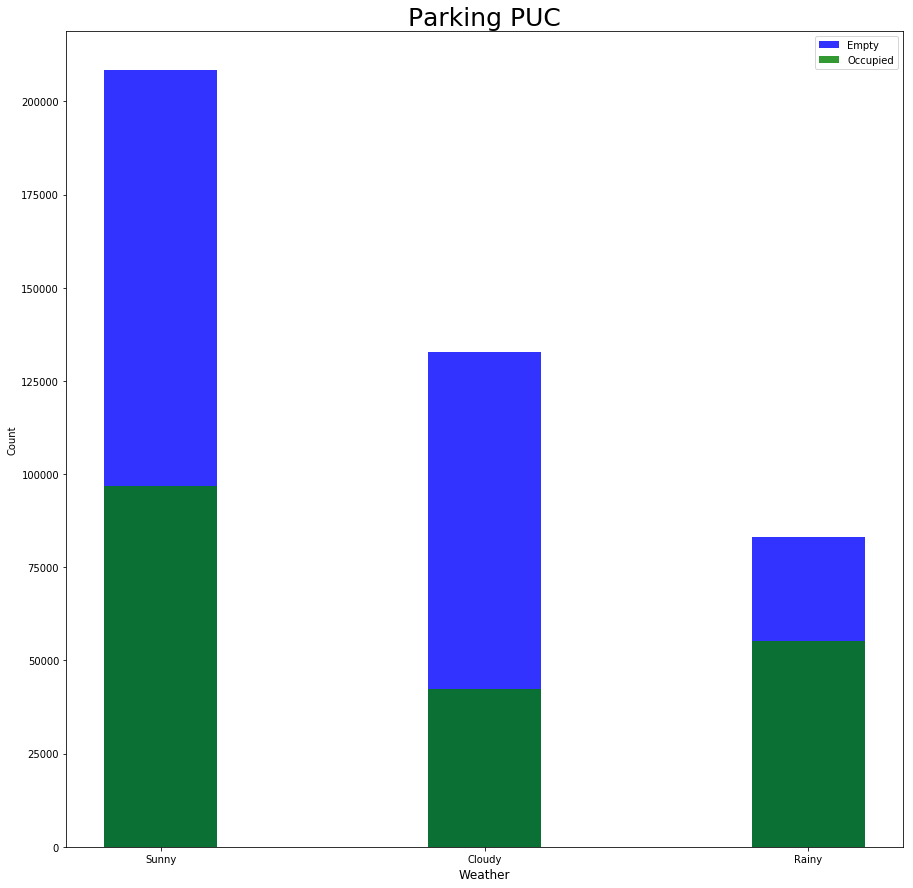

In [26]:

total = [len(PUC_Sunny_Empty)+len(PUC_Sunny_Occupied), len(PUC_Cloudy_Empty)+len(PUC_Cloudy_Occupied),len(PUC_Rainy_Empty)+len(PUC_Rainy_Occupied) ]
Occupied = [len(PUC_Sunny_Occupied), len(PUC_Cloudy_Occupied),len(PUC_Rainy_Occupied) ]
fig, ax = plt.subplots(figsize=(15,15))

index = [1,2,3]
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, total, bar_width,
alpha=opacity,
color='b',
label='Empty')

rects2 = plt.bar(index , Occupied, bar_width,
alpha=opacity,
color='g',
label='Occupied')
plt.xlabel('Weather',fontsize=12)
plt.ylabel('Count')

plt.title('Parking PUC',fontsize = 25)
plt.legend()
labels = ['Sunny','Cloudy','Rainy']
plt.xticks(index, labels)

plt.show()

**Parking UFPR04 (Parking 2)**

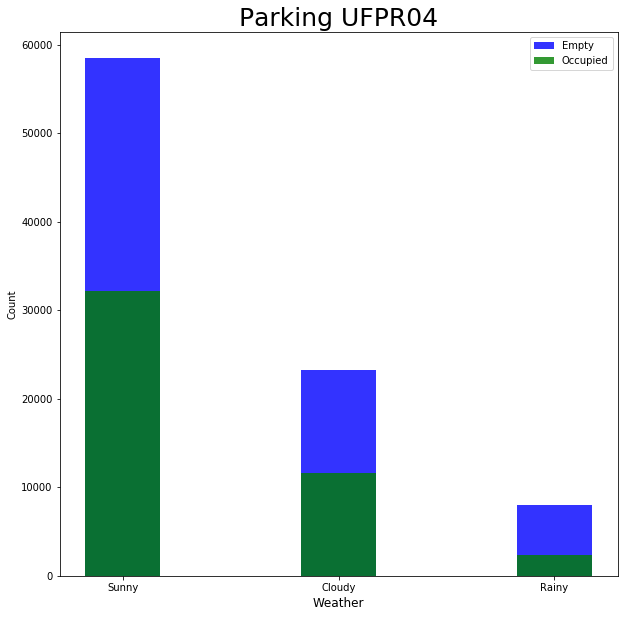

In [27]:

total = [len(UFPR04_Sunny_Empty)+len(UFPR04_Sunny_Occupied), len(UFPR04_Cloudy_Occupied)+len(UFPR04_Cloudy_Occupied),len(UFPR04_Rainy_Empty)+len(UFPR04_Rainy_Occupied) ]
Occupied = [len(UFPR04_Sunny_Occupied), len(UFPR04_Cloudy_Occupied),len(UFPR04_Rainy_Occupied) ]
fig, ax = plt.subplots(figsize=(10,10))

index = [1,2,3]
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, total, bar_width,
alpha=opacity,
color='b',
label='Empty')

rects2 = plt.bar(index , Occupied, bar_width,
alpha=opacity,
color='g',
label='Occupied')
plt.xlabel('Weather',fontsize=12)
plt.ylabel('Count')

plt.title('Parking UFPR04',fontsize=25)
plt.legend()
labels = ['Sunny','Cloudy','Rainy']
plt.xticks(index, labels)

plt.show()

**Parking UFPR05 (Parking 3)**

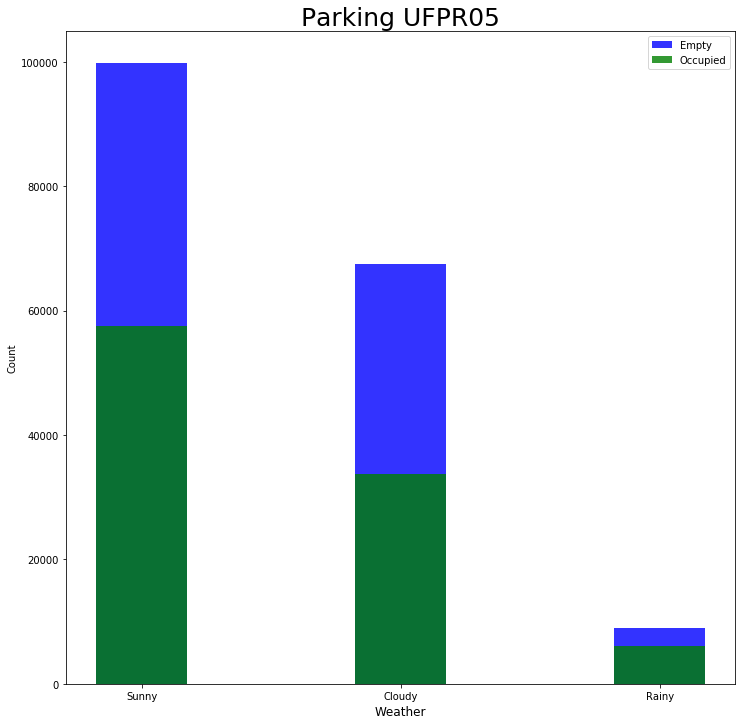

In [28]:

total = [len(UFPR05_Sunny_Empty)+len(UFPR05_Sunny_Occupied), len(UFPR05_Cloudy_Occupied)+len(UFPR05_Cloudy_Occupied),len(UFPR05_Rainy_Empty)+len(UFPR05_Rainy_Occupied) ]
Occupied = [len(UFPR05_Sunny_Occupied), len(UFPR05_Cloudy_Occupied),len(UFPR05_Rainy_Occupied) ]
fig, ax = plt.subplots(figsize=(12,12))

index = [1,2,3]
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, total, bar_width,
alpha=opacity,
color='b',
label='Empty')

rects2 = plt.bar(index , Occupied, bar_width,
alpha=opacity,
color='g',
label='Occupied')
plt.xlabel('Weather',fontsize=12)
plt.ylabel('Count')

plt.title('Parking UFPR05',fontsize=25)
plt.legend()
labels = ['Sunny','Cloudy','Rainy']
plt.xticks(index, labels)

plt.show()

### Zistenie rozlíšení obrázkov

In [19]:
Shapes = {(0,0)}

In [ ]:
for image in PUC_Sunny_Empty:
    img = cv2.imread(image)
    Shapes.add(img.shape[:2])
for image in PUC_Sunny_Empty:
    img = cv2.imread(image)
    Shapes.add(img.shape[:2])
for image in PUC_Sunny_Occupied:
    img = cv2.imread(image)
    Shapes.add(img.shape[:2])
for image in PUC_Cloudy_Empty:
    img = cv2.imread(image)
    Shapes.add(img.shape[:2])
for image in PUC_Cloudy_Occupied:
    img = cv2.imread(image)
    Shapes.add(img.shape[:2])
for image in PUC_Rainy_Empty:
    img = cv2.imread(image)
    Shapes.add(img.shape[:2])
for image in PUC_Rainy_Occupied:
    img = cv2.imread(image)
    Shapes.add(img.shape[:2])

In [25]:
print("Vsetky obrazky maju "+str(len(Shapes))+" roznych rozliseni")
print(Shapes)

Vsetky obrazky maju 93 roznych rozliseni
{(49, 37), (47, 35), (68, 39), (48, 37), (49, 32), (53, 40), (52, 32), (50, 39), (54, 39), (57, 34), (40, 38), (67, 46), (41, 39), (43, 36), (63, 41), (52, 42), (49, 35), (47, 40), (46, 32), (70, 54), (69, 54), (58, 48), (50, 40), (43, 30), (59, 46), (64, 55), (65, 54), (40, 32), (67, 40), (65, 40), (62, 42), (75, 36), (73, 52), (47, 31), (36, 35), (62, 39), (48, 38), (70, 39), (49, 39), (46, 36), (64, 49), (54, 36), (57, 33), (62, 45), (44, 32), (51, 37), (56, 46), (52, 38), (56, 33), (58, 44), (43, 34), (42, 38), (38, 32), (61, 43), (51, 32), (67, 43), (48, 28), (66, 44), (51, 42), (71, 56), (39, 34), (48, 39), (50, 37), (49, 43), (58, 40), (55, 32), (59, 37), (55, 45), (43, 38), (67, 37), (63, 36), (47, 39), (53, 38), (82, 54), (43, 37), (68, 40), (69, 45), (67, 53), (68, 54), (0, 0), (75, 49), (64, 47), (55, 42), (59, 47), (65, 46), (61, 32), (43, 32), (63, 45), (50, 31), (46, 41), (65, 36), (37, 32), (44, 40)}


Identifikovali sme 93 rôznych rozlíšení, ktoré sme opravovali pri načítaní dát pred trénovaním modelu

### Farba a osvetlenie

Farba obrázka bola rôzna v závislosti od farby auta alebo vlhkosti parkoviska. My sme chceli predísť rôznym problémom pri učení v závislosti s farbou tak sme pri načítaní dát aplikovali GRAYSCALE filter na všetky obrázky.

Osvetlenie obrázkov sme tiež nechceli upravovať, kvôli trom podmienkam počasia, ktoré sa v dátach nachádzajú. 

Keby sme upravovali osvetlenie tak by sa stratil rozdiel medzi obrázkami, ktoré boli nasnímané v slnečnom počasí a tými ktoré boli nasnímané v oblačnom počasí.

## Model

Pre naše riešenie sme sa inšpirovali výskumným článkom a ich upraveným modelom AlexNet, ktorý nazvali MiniAlexNet. Obrázok tejto architektúry môžeme vidieť o bunku nižšie.

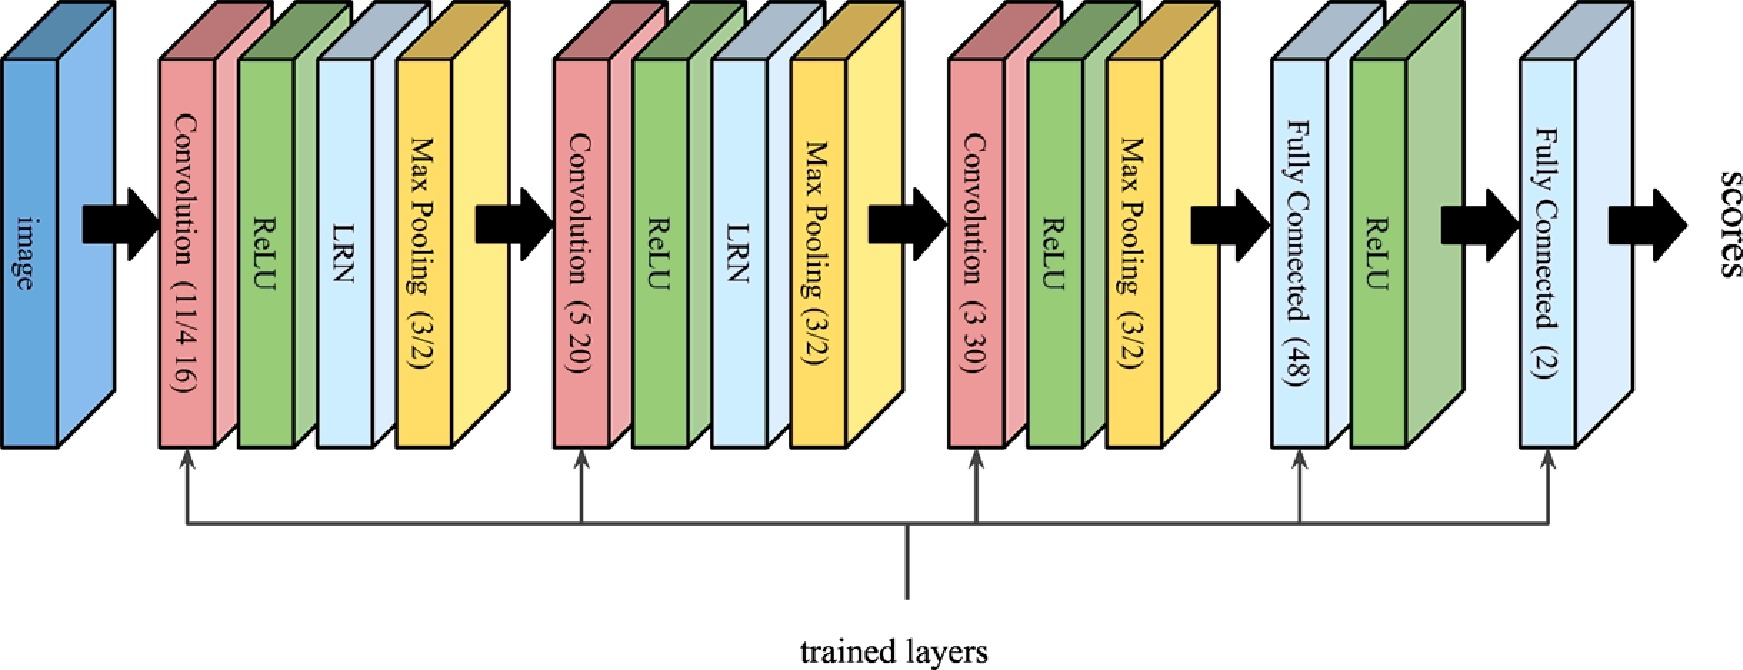

In [34]:
from IPython.display import Image
Image(filename='Model.jpg') 

V našom modeli sme však vynechali v prvých 2 vrstvách Local Response Normalizáciu. 

Náš výsledný model obsahuje 3 konvolučné vrstvy s aktivačnou funkciou ReLu a dve plne prepojené vrstvy. Jedna obsahuje aktivačnú funkciu Relu a druhá obsahuje aktivačnú funkciu softmax.